In [1]:
import requests
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set_style("darkgrid")

In [2]:
import datapane as dp

In [3]:
#game data
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

r = requests.get(url)

json_data = r.json()

elements_df = pd.DataFrame(json_data['elements'])
elements_types_df = pd.DataFrame(json_data['element_types'])
teams_df = pd.DataFrame(json_data['teams'])

In [4]:
json_data.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [5]:
json_data['total_players']

6743165

In [7]:
url = 'https://fantasy.premierleague.com/api/leagues-classic/617009/standings/'

r = requests.get(url)

league = r.json()

df_league = pd.DataFrame(league['standings']['results'])

df_league

,id,event_total,player_name,rank,last_rank,rank_sort,total,entry,entry_name
0,22488436,3,Pete Stebbing,1,0,1,3,1861744,Diego Marastebbo
1,20076908,2,Sam Guest,2,0,2,2,776505,Tossed Salah
2,25158712,2,George Baker Baker,2,0,3,2,1796385,Borocelona
3,33365266,2,Leo Anthias,2,0,4,2,4910848,Football FC
4,16523966,0,James Rivers,5,0,5,0,2805214,Cry me a River
5,16819673,0,Ted Rosner,5,0,6,0,107878,Blaise Maweedie
6,20241183,0,Henry Turnbull,5,0,7,0,1364762,Expected Ghouls
7,21699595,0,Henry Elks,5,0,8,0,2631883,Debbie Does Gallas
8,23446904,0,Luke Betham,5,0,9,0,1583735,Nanas Squad
9,23673927,0,Nick Sissling,5,0,10,0,3651523,Sissling Select


In [8]:
url = 'https://fantasy.premierleague.com/api/entry/4914782/history/'
r = requests.get(url)
json = r.json()
json.keys()

dict_keys(['current', 'past', 'chips'])

In [9]:
pd.DataFrame(json['past'])

,season_name,total_points,rank
0,2018/19,1579,5230067
1,2019/20,1883,3291247
2,2020/21,2045,2191579


In [10]:
df_all = pd.DataFrame(columns=['event', 'points', 'total_points', 'rank', 'rank_sort', 'overall_rank',
       'bank', 'value', 'event_transfers', 'event_transfers_cost',
       'points_on_bench', 'player','team_name'])
# get all players data from a league
for i, val in enumerate(df_league.entry):
    url = 'https://fantasy.premierleague.com/api/entry/{}/history/'.format(val)

    r = requests.get(url)

    json = r.json()

    df_temp=pd.DataFrame(json['current'])
    print(val,df_league.iloc[i,2],df_league.iloc[i,8])
    df_temp['player'] = df_league.iloc[i,2]
    df_temp['team_name'] = df_league.iloc[i,8]
    df_all= pd.concat([df_all,df_temp])
    

1861744 Pete Stebbing Diego Marastebbo
776505 Sam Guest Tossed Salah
1796385 George Baker Baker Borocelona
4910848 Leo Anthias Football FC
2805214 James Rivers Cry me a River
107878 Ted Rosner Blaise Maweedie
1364762 Henry Turnbull Expected Ghouls
2631883 Henry Elks Debbie Does Gallas
1583735 Luke Betham Nanas Squad
3651523 Nick Sissling Sissling Select
1390493 A A Nanas
1447926 James Fazackerley Mike Dean's Bean


In [11]:
# cleaning
for col in df_all:
    try:
        df_all[col]=df_all[col].astype(float)
    except:
        pass
    
df_all['player'] = df_all['player'].apply(lambda x: "Alex Andreou" if x == "A A" else x)
df_all['player'] = df_all['player'].apply(lambda x: "Turnbull" if x == "Henry Turnbull" else x)
df_all['player'] = df_all['player'].apply(lambda x: "Elks" if x == "Henry Elks" else x)
df_all['player'] = df_all['player'].apply(lambda x: x.split()[0])

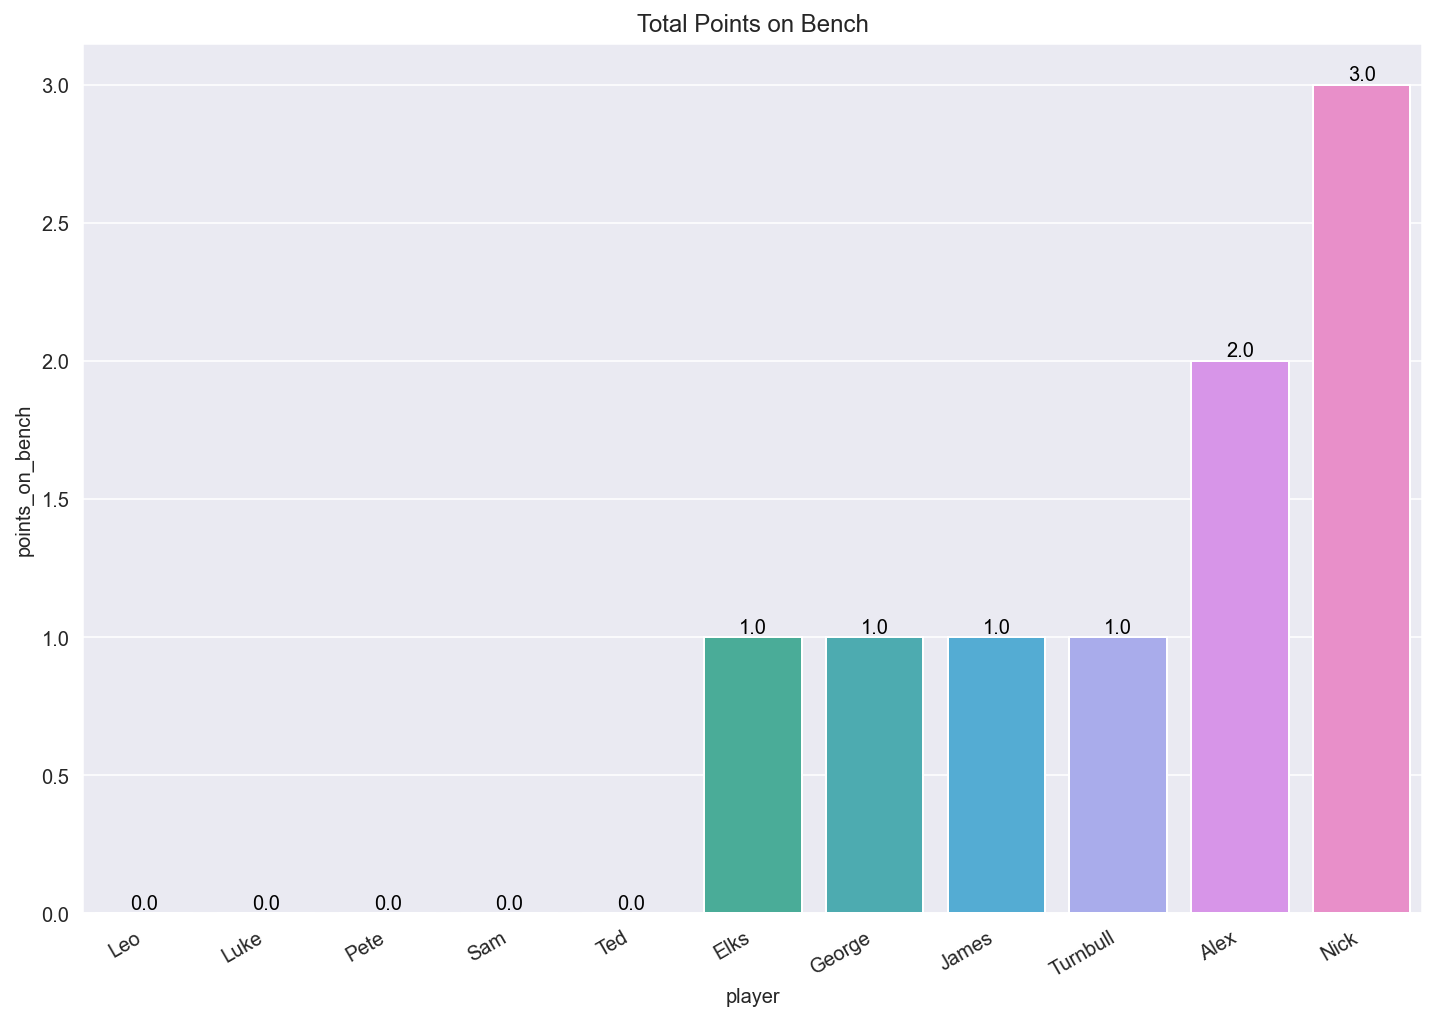

In [12]:
# Total points on Bench
df_temp = df_all.groupby('player').sum()[['points_on_bench']].sort_values('points_on_bench')
plt.figure(figsize=(12,8))
bench_chart=sns.barplot(y=df_temp.points_on_bench,x=df_temp.index)
plt.title("Total Points on Bench")
plt.xticks(rotation=30,ha="right")
for p in bench_chart.patches:
    bench_chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

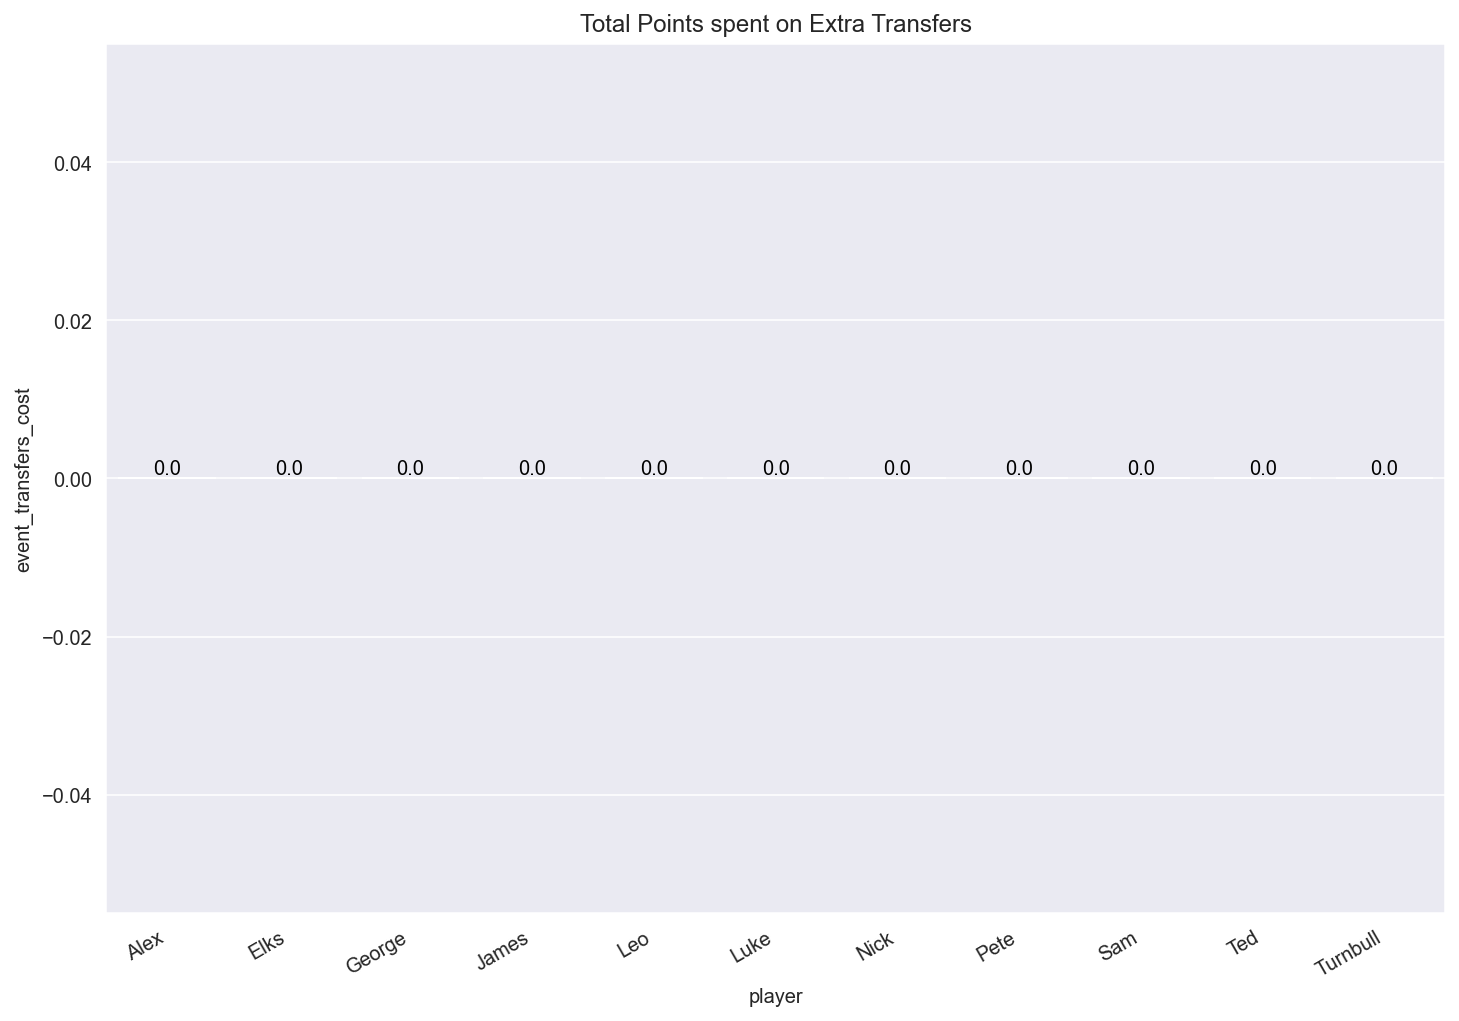

In [13]:
# Extra Transfers cost
df_temp = df_all.groupby('player').sum()[['event_transfers_cost']].sort_values('event_transfers_cost')
plt.figure(figsize=(12,8))
x_transfers = sns.barplot(y=df_temp.event_transfers_cost,x=df_temp.index,palette='Reds')
plt.title("Total Points spent on Extra Transfers")
plt.xticks(rotation=30,ha="right")
for p in x_transfers.patches:
    x_transfers.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

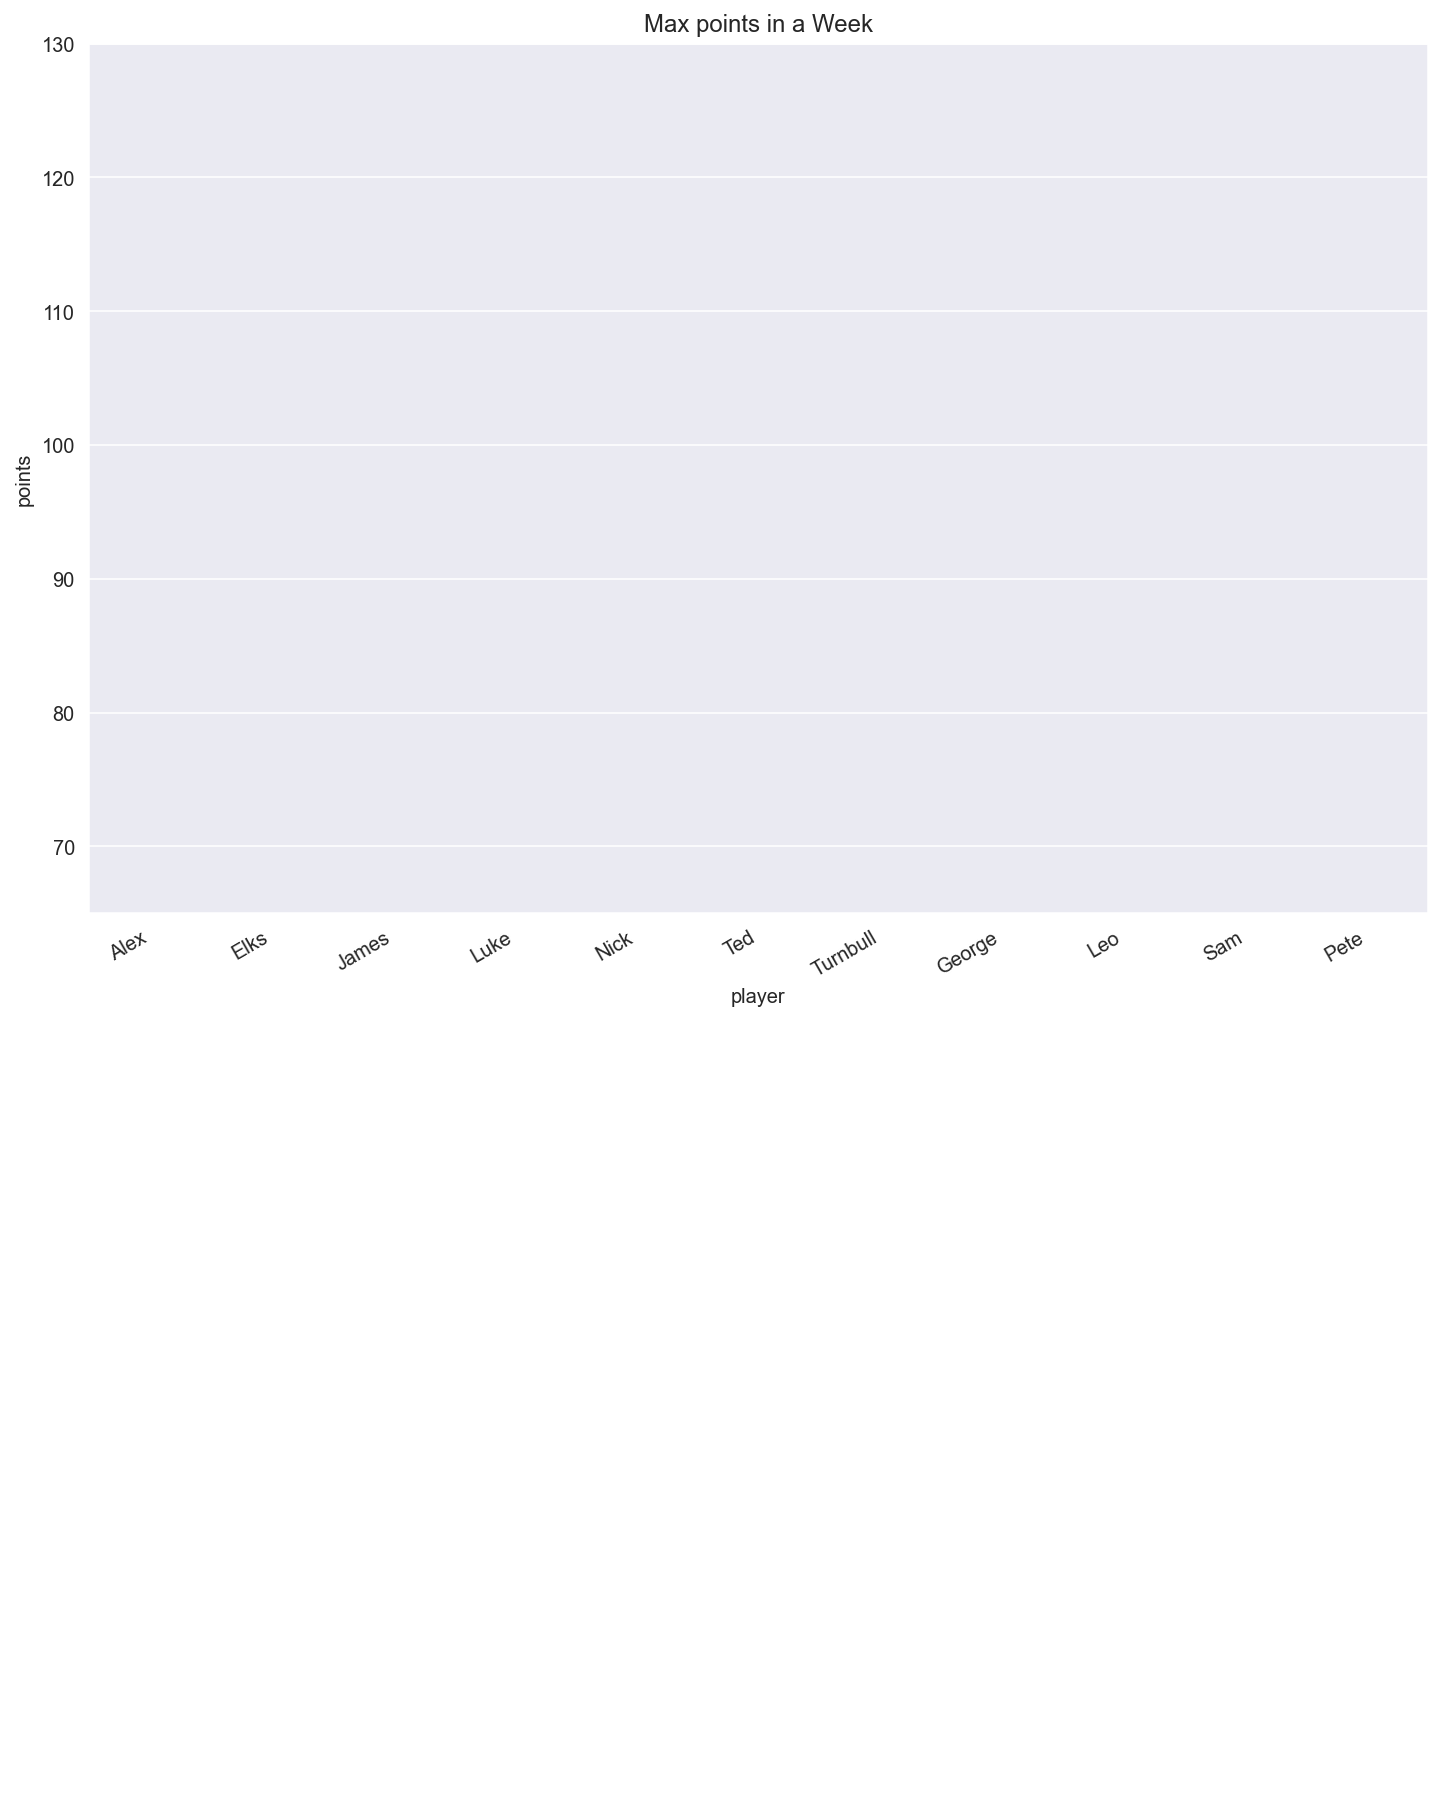

In [14]:
# Max points in a week
df_temp = df_all.groupby('player').max()[['points']].sort_values('points')
plt.figure(figsize=(12,8))
max_week = sns.barplot(y=df_temp.points,x=df_temp.index,palette='Blues_d')
plt.title("Max points in a Week")
plt.xticks(rotation=30,ha="right")
for p in max_week.patches:
    max_week.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.ylim(65,130)
plt.show()

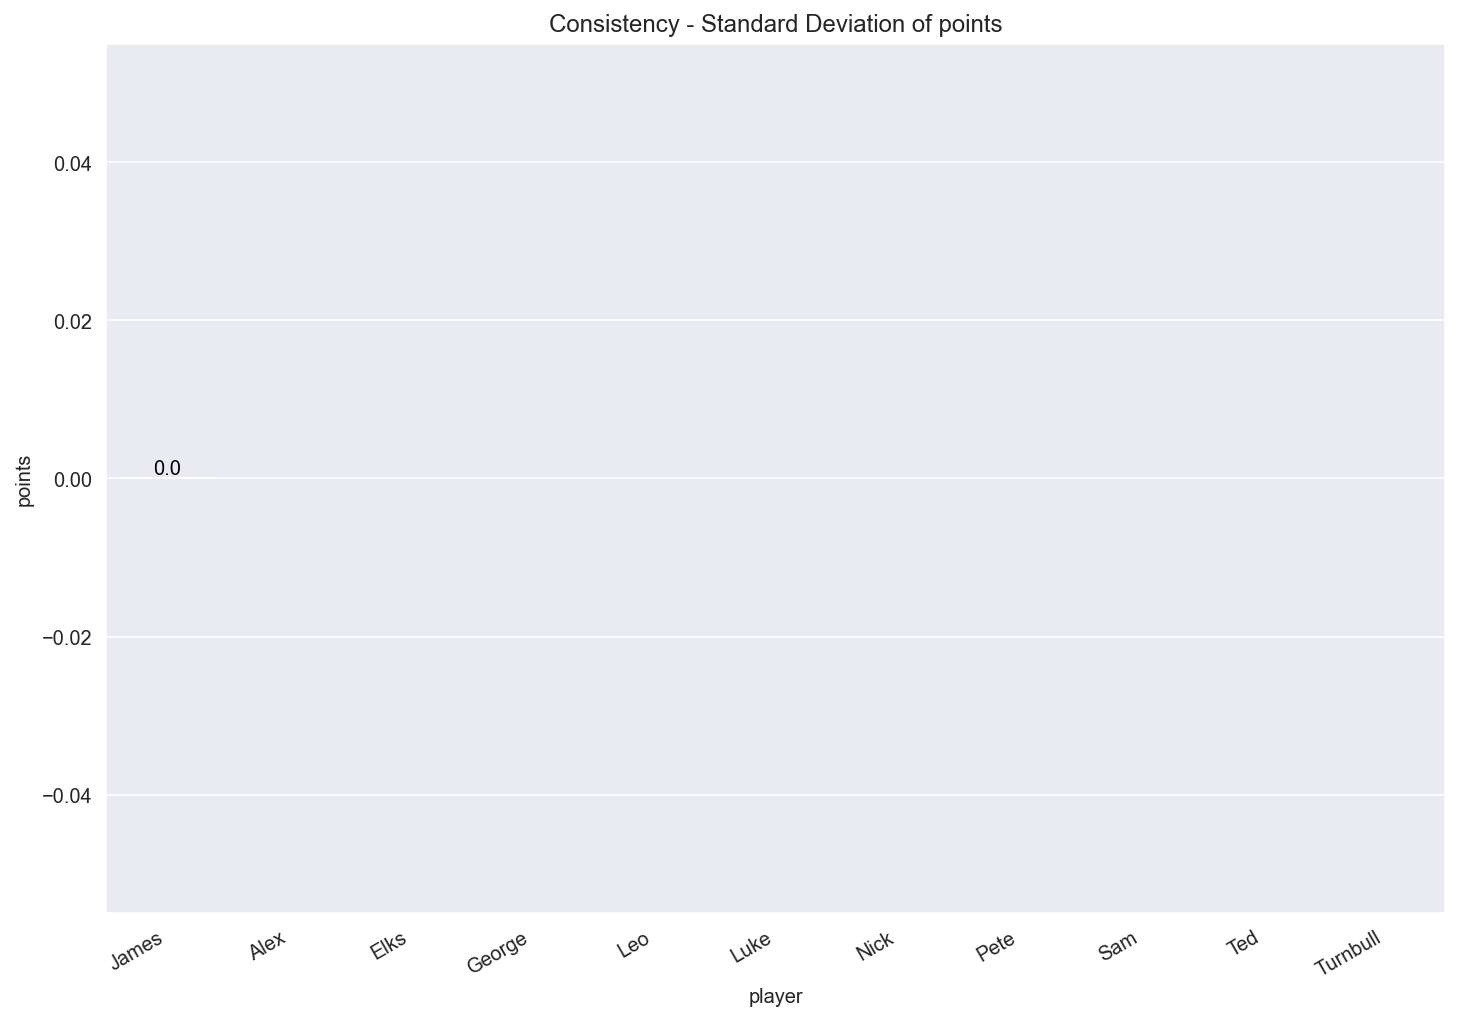

In [15]:
# Std dev points 
df_temp = df_all.groupby('player').std()[['points']].sort_values('points')
plt.figure(figsize=(12,8))
consistency=sns.barplot(y=df_temp.points,x=df_temp.index,palette="GnBu_d")
plt.title("Consistency - Standard Deviation of points")
plt.xticks(rotation=30,ha="right")
for p in consistency.patches:
    consistency.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

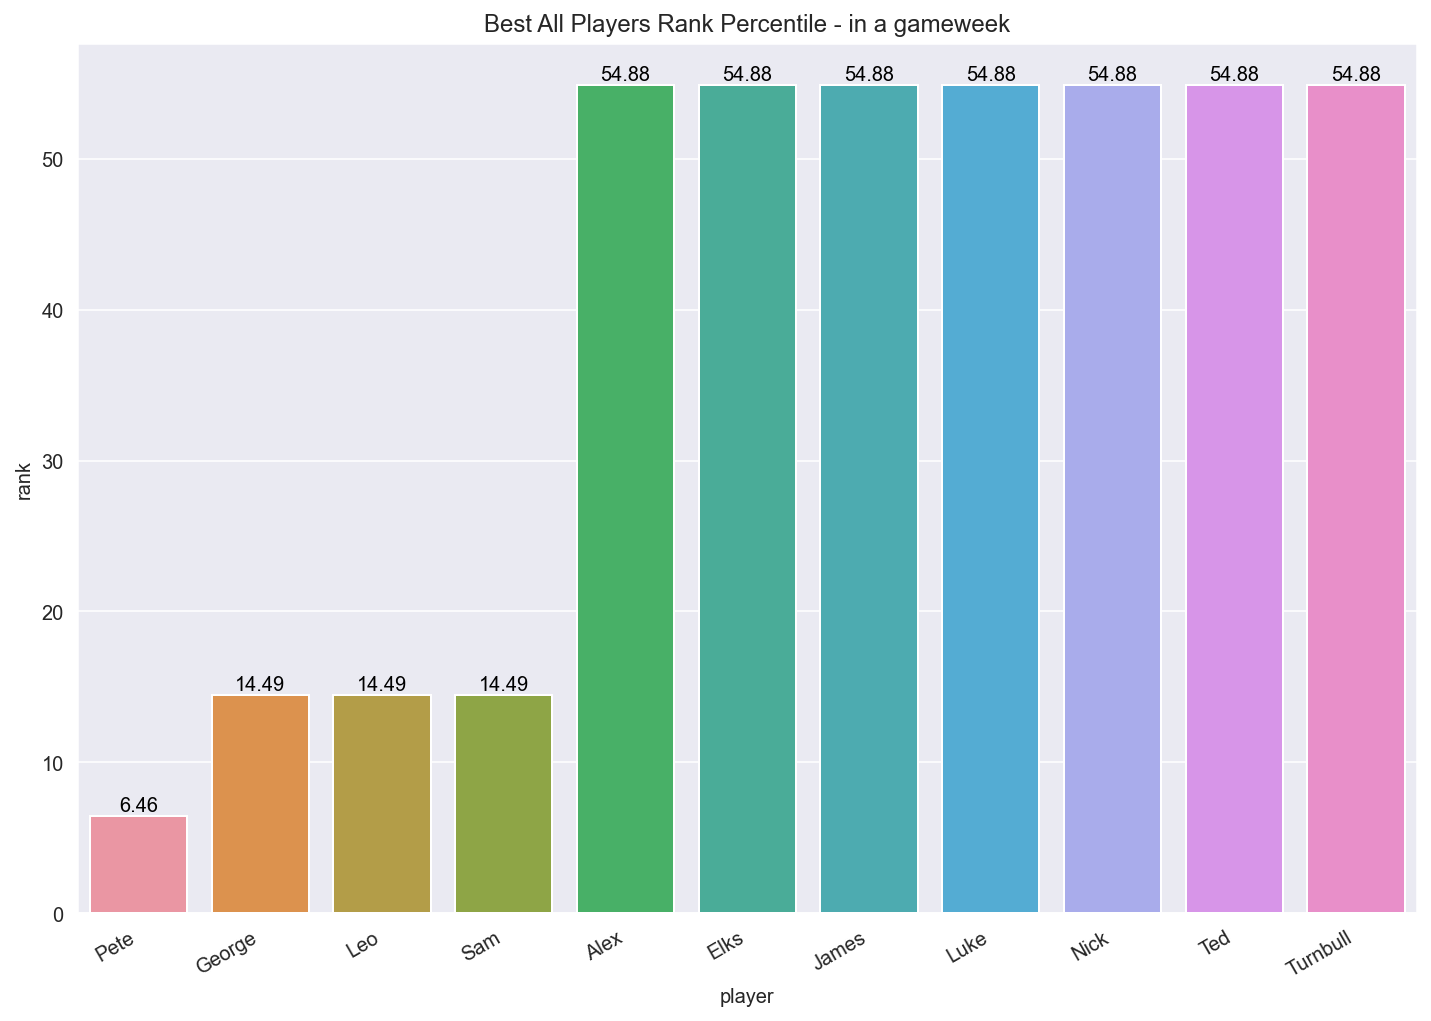

In [16]:
# Best UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').min()[['rank']].sort_values('rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart=sns.barplot(y=df_temp['rank'],x=df_temp.index)
plt.title("Best All Players Rank Percentile - in a gameweek")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

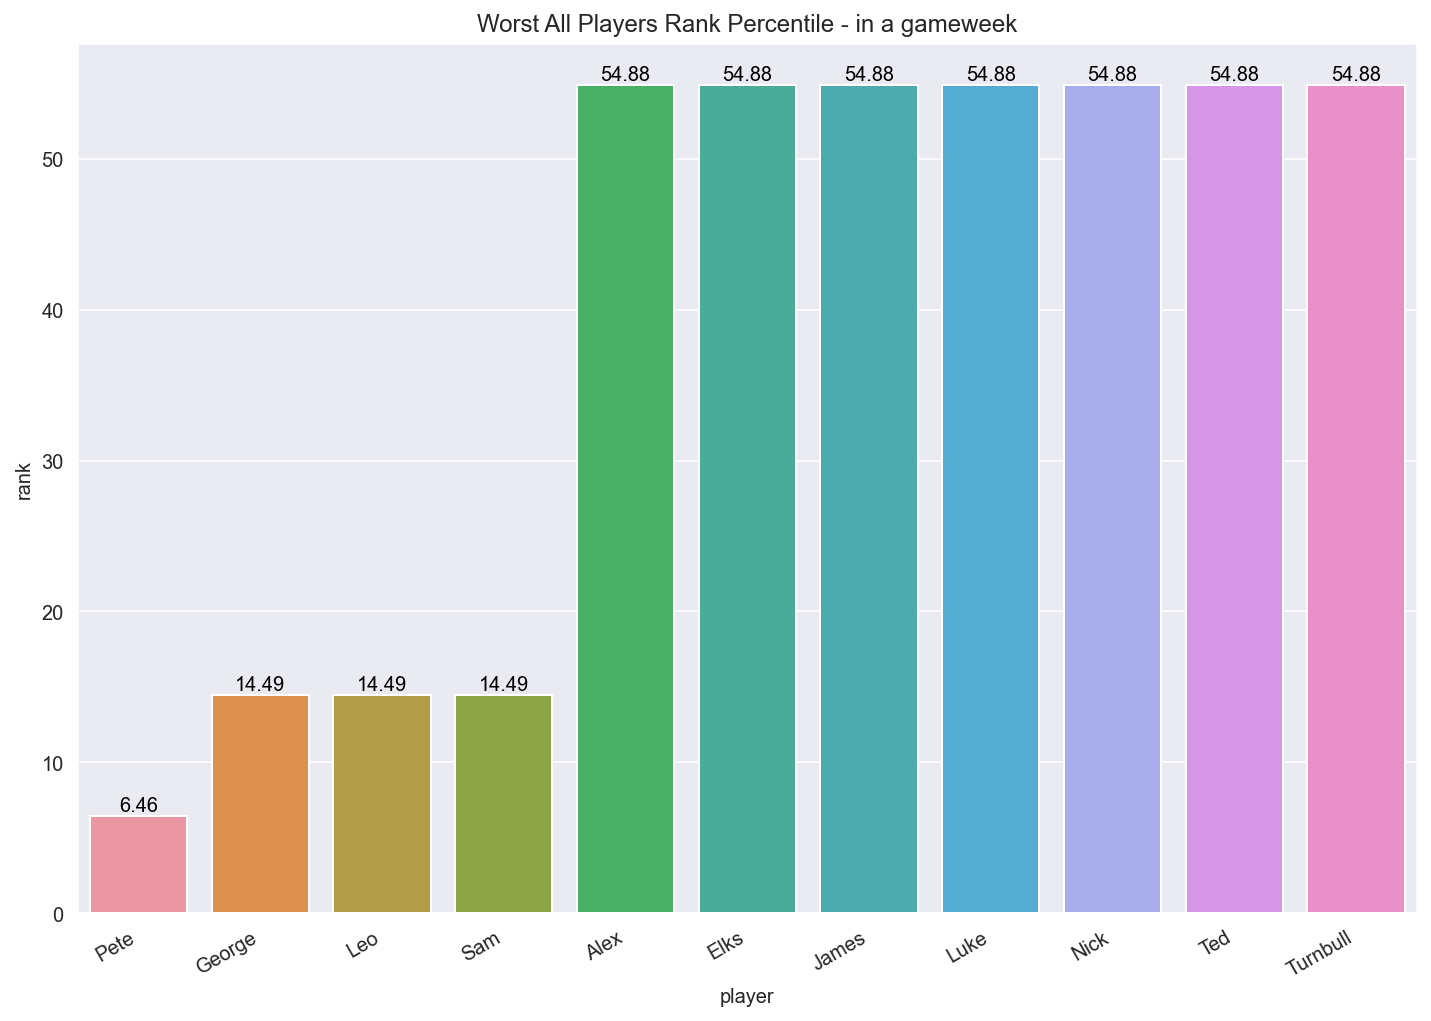

In [17]:
# Worst UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').max()[['rank']].sort_values('rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['rank'],x=df_temp.index)
plt.title("Worst All Players Rank Percentile - in a gameweek")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

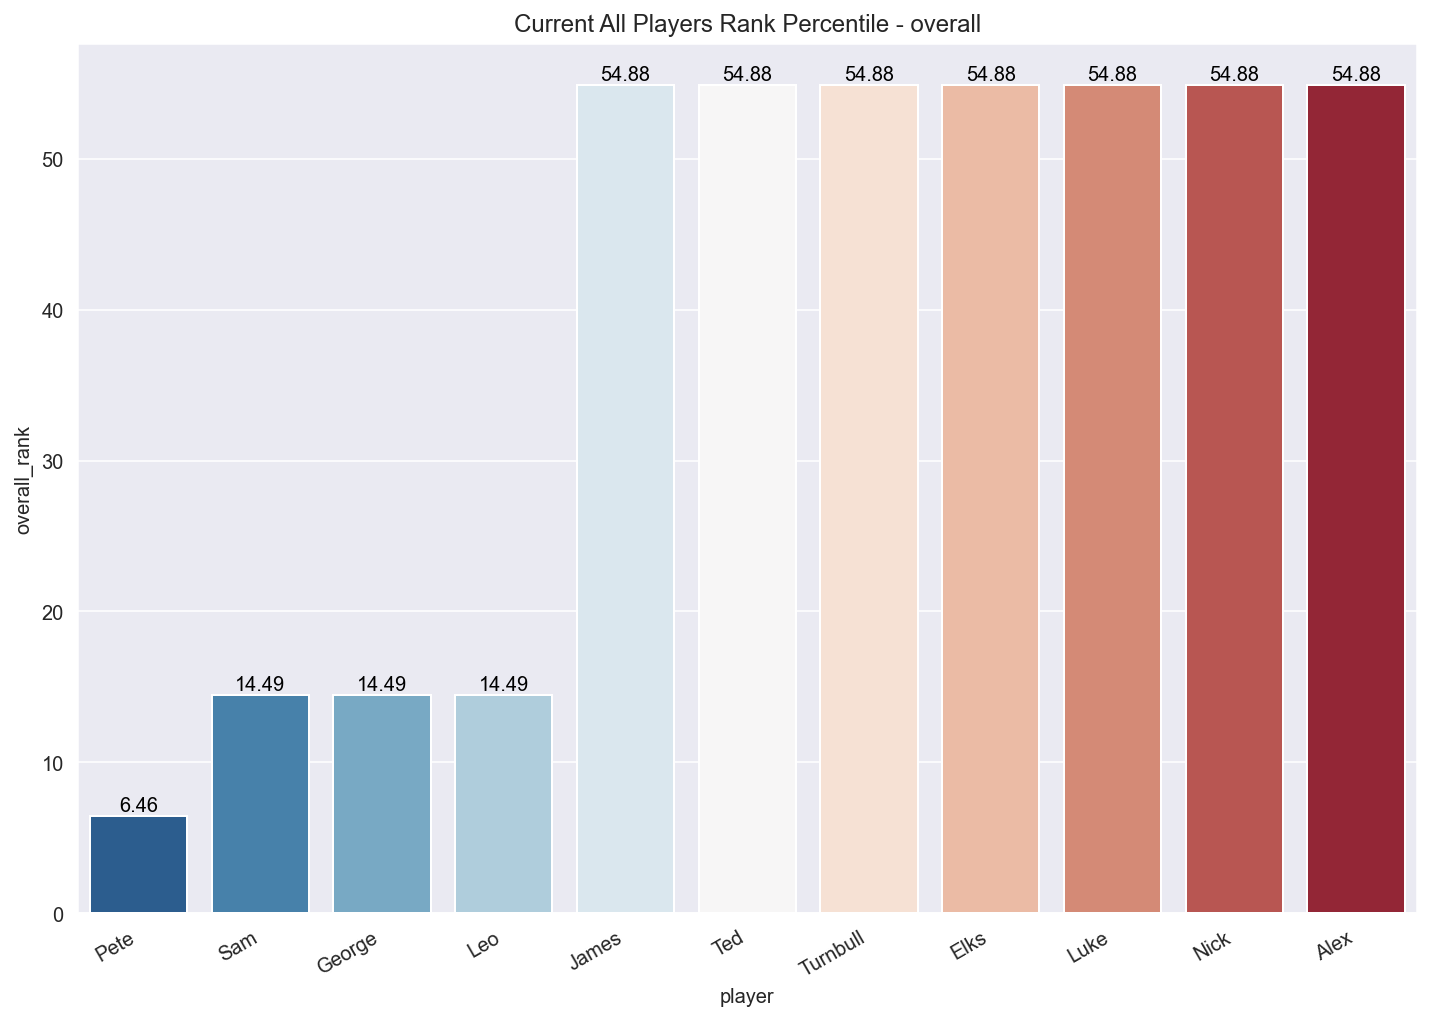

In [18]:
# Current all players rank
df_temp = df_all[df_all['event']==df_all['event'].max()][['overall_rank','player']].sort_values('overall_rank')
df_temp['overall_rank']=df_temp['overall_rank']/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
current_percentile = sns.barplot(y=df_temp['overall_rank'],x=df_temp.player, palette = "RdBu_r")
plt.title("Current All Players Rank Percentile - overall")
plt.xticks(rotation=30,ha="right")
for p in current_percentile.patches:
    current_percentile.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

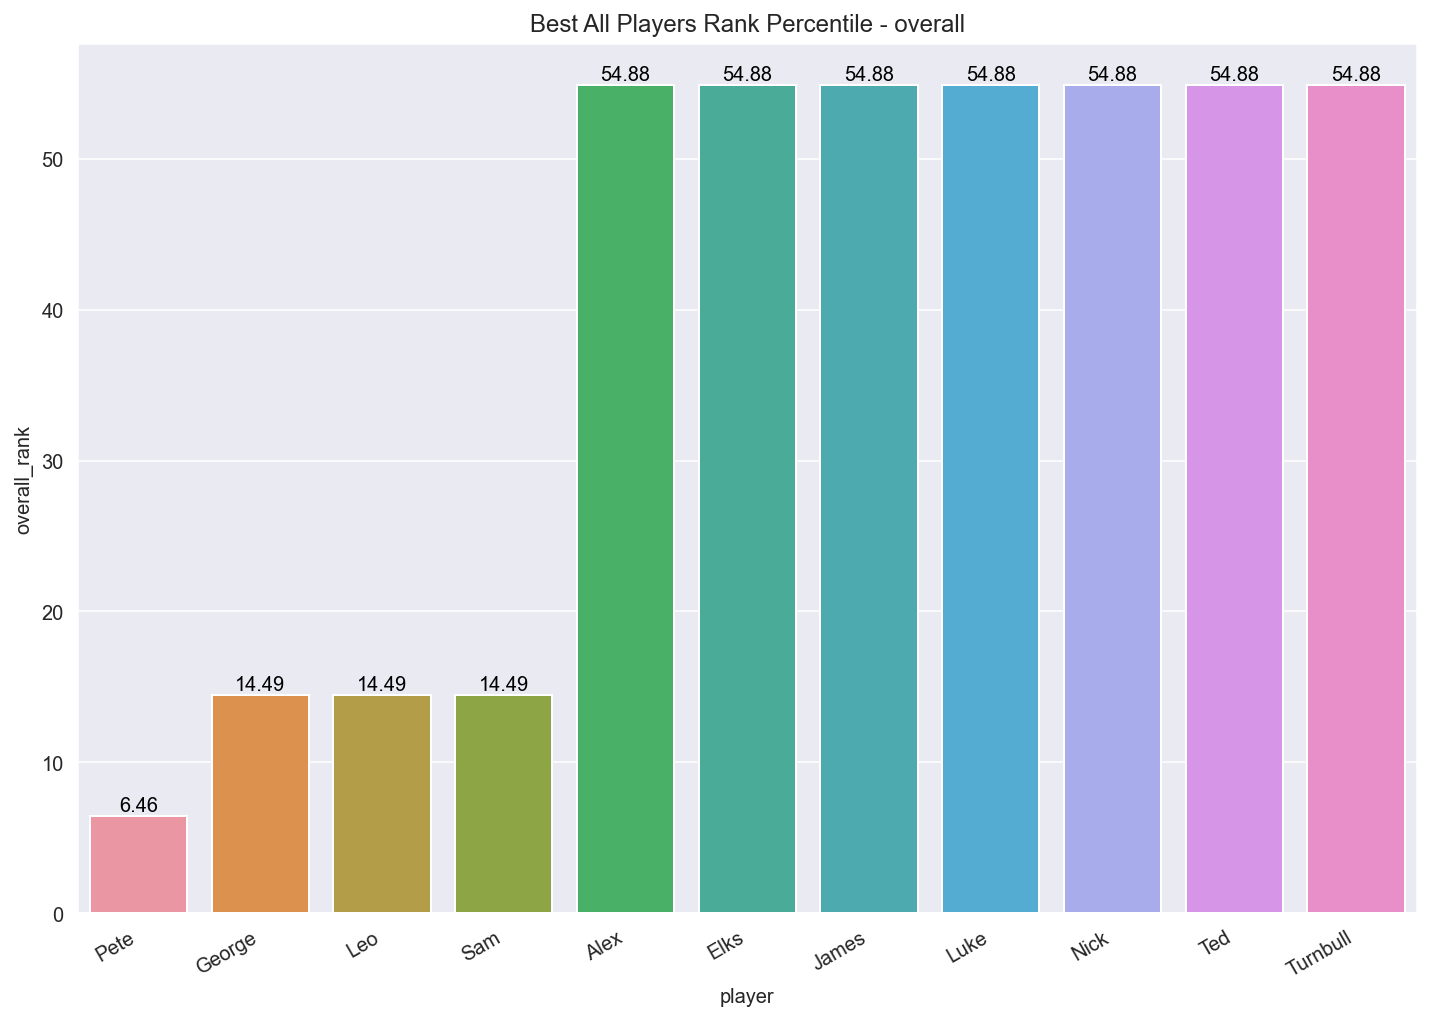

In [19]:
# Best UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').min()[['overall_rank']].sort_values('overall_rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['overall_rank'],x=df_temp.index)
plt.title("Best All Players Rank Percentile - overall")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

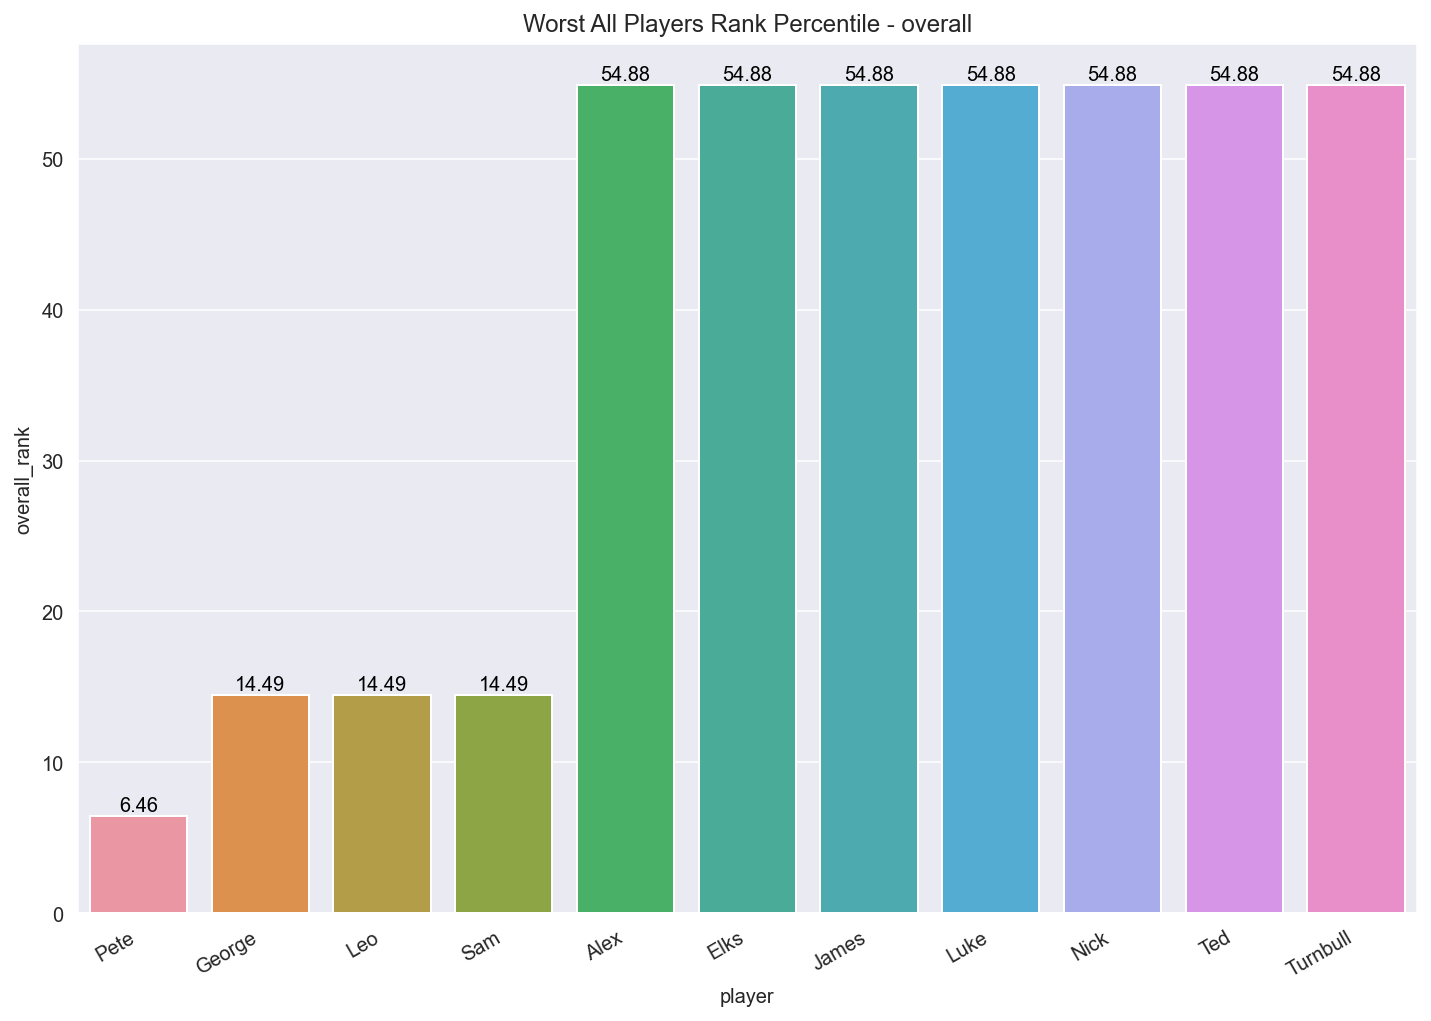

In [20]:
# Best UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').max()[['overall_rank']].sort_values('overall_rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['overall_rank'],x=df_temp.index)
plt.title("Worst All Players Rank Percentile - overall")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

In [21]:
df_all = df_all.sort_values(by='event')
rank_list = []
for e in df_all.event.unique():
    df_temp = df_all[df_all.event==e]
    rank_list+=df_temp.total_points.rank(method='min',ascending=False).tolist()

In [22]:
df_all['rankpw']=rank_list

In [23]:
df_all

,event,points,total_points,rank,rank_sort,overall_rank,bank,value,event_transfers,event_transfers_cost,points_on_bench,player,team_name,rankpw
0,1.0,3.0,3.0,435476.0,605673.0,435476.0,0.0,1000.0,0.0,0.0,0.0,Pete,Diego Marastebbo,1.0
0,1.0,2.0,2.0,977236.0,1234371.0,977236.0,0.0,1000.0,0.0,0.0,0.0,Sam,Tossed Salah,2.0
0,1.0,2.0,2.0,977236.0,1499099.0,977236.0,0.0,1000.0,0.0,0.0,1.0,George,Borocelona,2.0
0,1.0,2.0,2.0,977236.0,2202713.0,977236.0,0.0,1000.0,0.0,0.0,0.0,Leo,Football FC,2.0
0,1.0,0.0,0.0,3700473.0,4811809.0,3700472.0,0.0,1000.0,0.0,0.0,1.0,James,Cry me a River,5.0
0,1.0,0.0,0.0,3700473.0,3735476.0,3700472.0,5.0,1000.0,0.0,0.0,0.0,Ted,Blaise Maweedie,5.0
0,1.0,0.0,0.0,3700473.0,4214190.0,3700472.0,0.0,1000.0,0.0,0.0,1.0,Turnbull,Expected Ghouls,5.0
0,1.0,0.0,0.0,3700473.0,4738537.0,3700472.0,0.0,1000.0,0.0,0.0,1.0,Elks,Debbie Does Gallas,5.0
0,1.0,0.0,0.0,3700473.0,4302267.0,3700472.0,0.0,1000.0,0.0,0.0,0.0,Luke,Nanas Squad,5.0
0,1.0,0.0,0.0,3700473.0,5185955.0,3700472.0,0.0,1000.0,0.0,0.0,3.0,Nick,Sissling Select,5.0


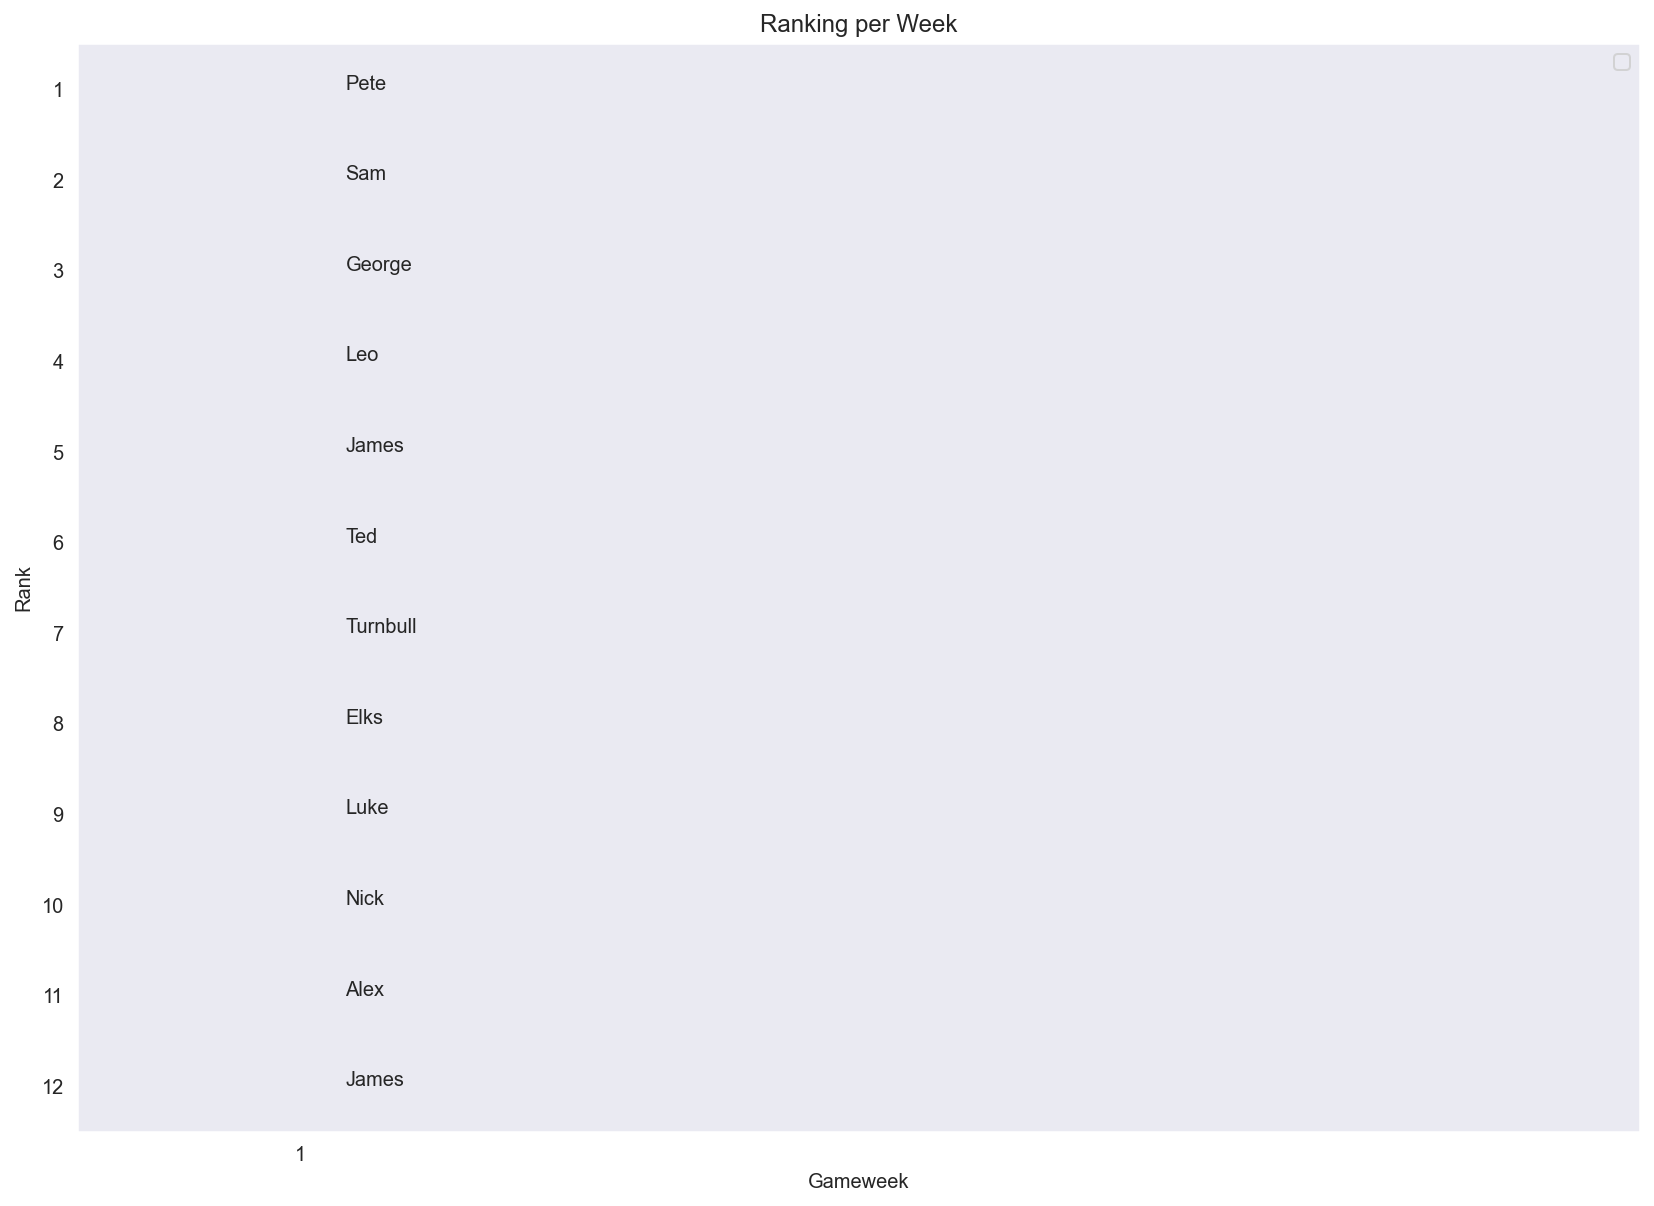

In [24]:
gw = int(df_all.event.max())
curr_rank_list = df_all[df_all.event==gw].sort_values("total_points",ascending=False)["player"].tolist()
sns.set_style('dark')
plt.figure(figsize=(14,10))
ranking=sns.lineplot(y=df_all.rankpw,x=df_all.event,hue=df_all.player)
for i, name in enumerate(curr_rank_list):
    ranking.annotate(name,(gw+0.1,i+1))
plt.yticks(range(1,13))
plt.xticks(range(1,gw+1))
plt.xlim(0.5,gw+3)
plt.ylim(12.5,0.5)
plt.title("Ranking per Week")
plt.xlabel("Gameweek")
plt.ylabel("Rank")
plt.legend("")
plt.show()

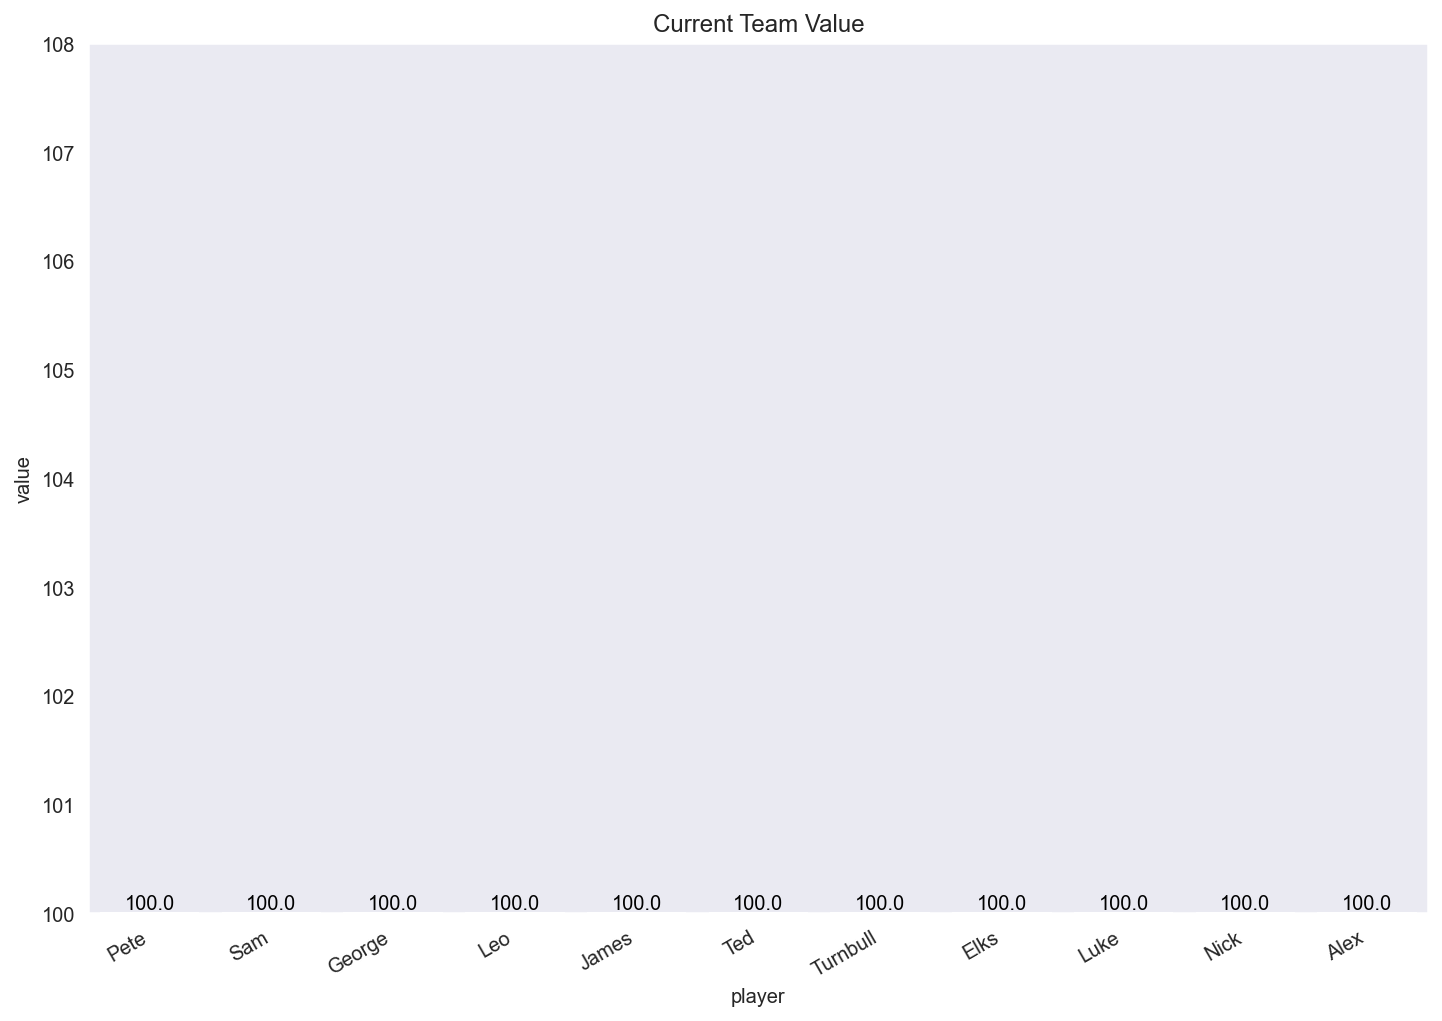

In [25]:
# Current team value
df_temp = df_all[df_all['event']==df_all['event'].max()][['value','bank','player']].sort_values('value')
# df_temp['']
plt.figure(figsize=(12,8))
team_value = sns.barplot(y=df_temp['value']/10,x=df_temp.player,palette='PuBuGn_d')
plt.title("Current Team Value")
plt.xticks(rotation=30,ha="right")
for p in team_value.patches:
    team_value.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.ylim(100,108)
plt.show()

## Looking at ownership

In [26]:
#Formatting names
df_league['player'] = df_league['player_name'].apply(lambda x: "Alex Andreou" if x == "A A" else x)
df_league['player'] = df_league['player'].apply(lambda x: "Turnbull" if x == "Henry Turnbull" else x)
df_league['player'] = df_league['player'].apply(lambda x: "Elks" if x == "Henry Elks" else x)
df_league['player'] = df_league['player'].apply(lambda x: x.split()[0])

In [27]:
#Looping through and creating a df of the leagues picks
for row in df_league.index:
    url = "https://fantasy.premierleague.com/api/entry/{}/event/{}/picks/".format(df_league.iloc[row,7],gw)
    r = requests.get(url)
    picks = r.json()
    if row == 0:
        df_picks = pd.DataFrame(picks['picks'])
        df_picks['player'] = df_league.iloc[row,-1]
    else:
        df_temp = pd.DataFrame(picks['picks'])
        df_temp['player'] = df_league.iloc[row,-1]
        df_picks = pd.concat([df_picks,df_temp])

In [28]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json_data = r.json()
player_df = pd.DataFrame(json_data['elements'])
teams_df = pd.DataFrame(json_data['teams'])
player_df.team = player_df.team.map(pd.Series(teams_df.name.values,teams_df.id).to_dict())

In [29]:
df_picks['web_name'] = df_picks.element.map(pd.Series(player_df.web_name.values,player_df.id).to_dict())
df_picks['team']=df_picks.element.map(pd.Series(player_df.team.values,player_df.id).to_dict())

In [30]:
df_picks.head()

,element,position,multiplier,is_captain,is_vice_captain,player,web_name,team
0,69,1,1,False,False,Pete,Sánchez,Brighton
1,237,2,1,False,False,Pete,Alexander-Arnold,Liverpool
2,275,3,1,False,False,Pete,Shaw,Man Utd
3,67,4,1,False,False,Pete,White,Arsenal
4,240,5,1,False,False,Pete,Jota,Liverpool


In [31]:
df_EO = df_picks.groupby(["web_name","team"])[['multiplier']].sum()/len(df_league.index)*100
df_EO = df_EO.reset_index()
df_EO = df_EO[df_EO.multiplier>1/len(df_league.index)*100]
df_EO = df_EO.sort_values(by='multiplier',ascending=False)

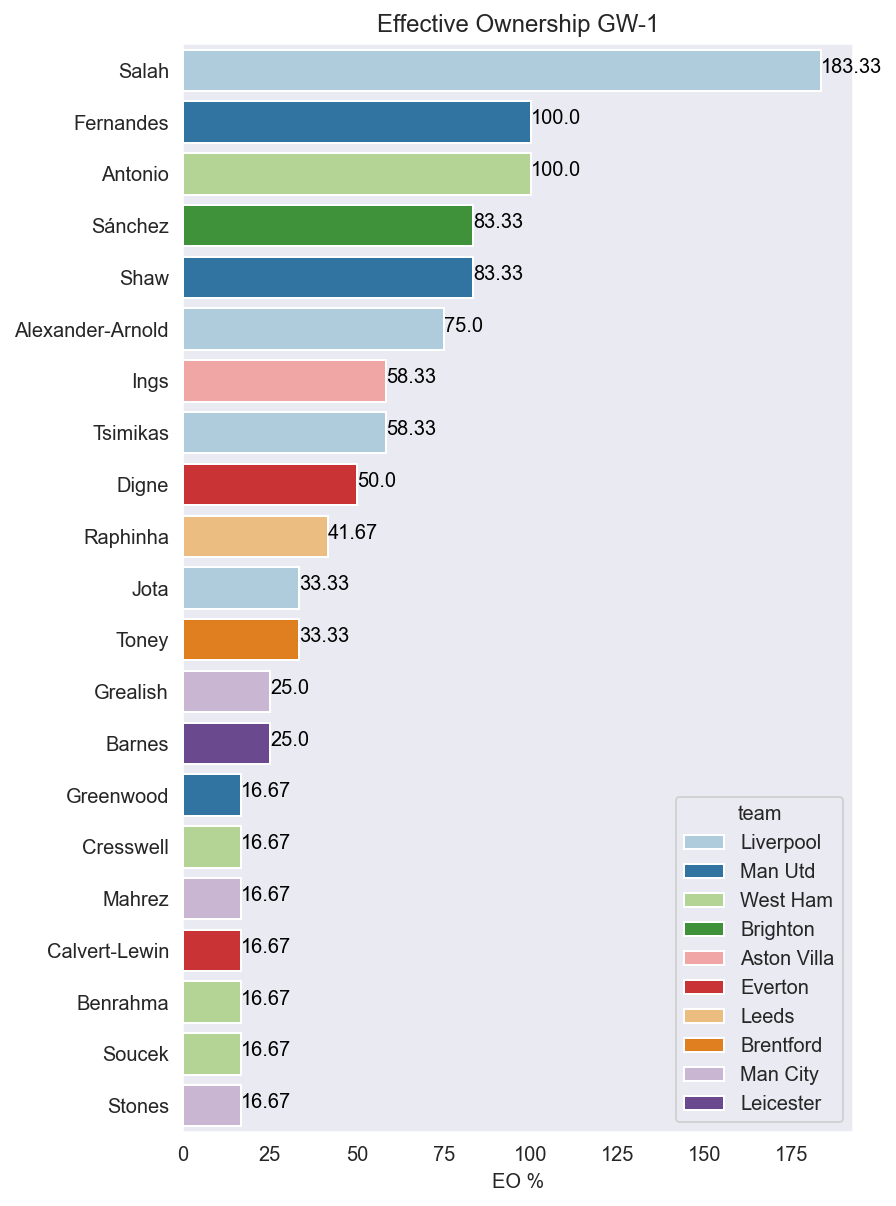

In [32]:
plt.figure(figsize=(6,10))
EO_plot = sns.barplot(y=df_EO.web_name,x=df_EO.multiplier,hue=df_EO.team,dodge=False,palette='Paired')
plt.title("Effective Ownership GW-{}".format(gw))
plt.xlabel("EO %")
plt.ylabel("")
for p in EO_plot.patches:
    EO_plot.annotate(round(p.get_width(),2), (p.get_width(),p.get_y()+p.get_height()/1.5),
     ha='left', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

In [33]:
df_picks[df_picks.web_name == "Salah"]

,element,position,multiplier,is_captain,is_vice_captain,player,web_name,team
5,233,6,2,True,False,Pete,Salah,Liverpool
5,233,6,2,True,False,Sam,Salah,Liverpool
4,233,5,2,True,False,George,Salah,Liverpool
6,233,7,2,True,False,Leo,Salah,Liverpool
4,233,5,2,True,False,James,Salah,Liverpool
7,233,8,2,True,False,Ted,Salah,Liverpool
5,233,6,2,True,False,Turnbull,Salah,Liverpool
6,233,7,2,True,False,Elks,Salah,Liverpool
6,233,7,2,True,False,Luke,Salah,Liverpool
7,233,8,2,True,False,Nick,Salah,Liverpool


In [34]:
# Cheeky differentials
df_diff = df_picks.groupby(["web_name"])[['multiplier']].sum()
df_diff = df_diff[df_diff.multiplier==1]
df_diff = df_diff.reset_index()
df_diff['player'] = df_diff.web_name.map(pd.Series(df_picks[df_picks.multiplier!=0].player.values,df_picks[df_picks.multiplier!=0].web_name).to_dict())
df_diff.drop('multiplier',inplace=True,axis=1)
df_diff.columns = ["Rogue Choice", "Manager"]
df_diff = df_diff.sort_values('Manager')
df_diff = df_diff.set_index('Manager')

In [35]:
df_diff

,Rogue Choice
Manager,
Alex,Dallas
Alex,Iheanacho
James,Adams
James,Chilwell
James,Fabianski
James,Gündogan
Luke,Bamford
Luke,Targett
Luke,Wan-Bissaka


In [36]:
player_df

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,NaN,NaN,80201,0,0,0,0,0,1,2.6,...,245,45,21,2,NaN,,NaN,,NaN,
1,NaN,NaN,115918,0,0,0,0,0,1,1.0,...,35,10,42,12,NaN,,NaN,,NaN,
2,NaN,NaN,47431,0,0,0,0,0,3,2.2,...,465,187,465,187,1.0,,2.0,,NaN,
3,25.0,25.0,54694,0,0,0,0,0,4,0.8,...,523,67,523,67,NaN,,NaN,,1.0,
4,NaN,NaN,58822,0,0,0,0,0,2,1.7,...,81,38,88,41,NaN,,5.0,,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,NaN,NaN,19236,0,0,0,0,0,1,1.3,...,58,17,65,19,NaN,,NaN,,NaN,
528,NaN,NaN,222564,0,0,0,0,0,3,1.6,...,455,180,455,180,NaN,,NaN,,NaN,
529,NaN,NaN,448514,0,0,0,0,0,2,1.2,...,214,110,217,110,NaN,,NaN,,NaN,
530,NaN,NaN,149065,0,0,0,0,0,1,2.1,...,273,49,274,49,NaN,,NaN,,NaN,


In [37]:
# Captaining error

#LoopThrough league managers

    #Loop through gws
        #Loop through active players
url = "https://fantasy.premierleague.com/api/entry/1409005/event/28/picks/"
r = requests.get(url)
picks = r.json()
df_temp3 = pd.DataFrame(picks['picks']) 
df_temp3
# for player in df_temp3.element:
# load player history - link to fixtures to find gw and then look back up in player history
#compare all multiplier 1 to multiplier 2 - if no multiplier 2 then max


KeyError: 'picks'

In [38]:
url = "https://fantasy.premierleague.com/api/element-summary/273/"
r = requests.get(url)
json_data = r.json()
pd.DataFrame(json_data['history'])

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out
0,273,6,10,1,True,2021-08-14T11:30:00Z,0,0,1,20,...,2,0.0,0.0,0.0,0.0,55,0,842854,0,0


In [39]:
df_league

,id,event_total,player_name,rank,last_rank,rank_sort,total,entry,entry_name,player
0,22488436,3,Pete Stebbing,1,0,1,3,1861744,Diego Marastebbo,Pete
1,20076908,2,Sam Guest,2,0,2,2,776505,Tossed Salah,Sam
2,25158712,2,George Baker Baker,2,0,3,2,1796385,Borocelona,George
3,33365266,2,Leo Anthias,2,0,4,2,4910848,Football FC,Leo
4,16523966,0,James Rivers,5,0,5,0,2805214,Cry me a River,James
5,16819673,0,Ted Rosner,5,0,6,0,107878,Blaise Maweedie,Ted
6,20241183,0,Henry Turnbull,5,0,7,0,1364762,Expected Ghouls,Turnbull
7,21699595,0,Henry Elks,5,0,8,0,2631883,Debbie Does Gallas,Elks
8,23446904,0,Luke Betham,5,0,9,0,1583735,Nanas Squad,Luke
9,23673927,0,Nick Sissling,5,0,10,0,3651523,Sissling Select,Nick


In [40]:
## Publishing to datapane

In [41]:
dp.login(token="091830a120b8c1f1cde36fd23c9e06d4b81bfc6b")
r = dp.Report(
    f'### Effective Ownership FPL League',
    f'Graphing the most important league in FPL',
    dp.Plot(ranking),
    dp.Plot(EO_plot,responsive=False),
    '#### Cheeky differentials GW-{}'.format(gw),
    dp.Table(df_diff),
    dp.Plot(bench_chart),
    dp.Plot(x_transfers),
    dp.Plot(max_week),
    dp.Plot(consistency),
    dp.Plot(current_percentile),
    dp.Plot(team_value)
)

Connected successfully to https://datapane.com as lukebetham


Bokeh version 2.3.0 is not supported, your plots may not display correctly, please install version ~=2.2.0


In [42]:
dp.login(token="091830a120b8c1f1cde36fd23c9e06d4b81bfc6b")
data = dp.Report(
    f'### Effective Ownership FPL League - data',
    dp.DataTable(df_all)
)

Connected successfully to https://datapane.com as lukebetham


In [43]:
r.publish(name=f'FPL League Rankings', open=True, description=f'')

Publishing document and associated data - *please wait...*

Report successfully published at https://datapane.com/u/lukebetham/reports/fpl-league-rankings/ - you can edit and add additional text from the link

In [ ]:
data.publish(name=f'LukeStepsUp Data', open=True, description=f'')

In [ ]:
df_all[df_all.event==1].total_points.rank(method='min',ascending=False)

In [ ]:
df_all[df_all['event']==14]